In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Exploration

Binary dataset, 564 of class 1 and 282 of class 2, together 846

1    564
2    282
Name: Class, dtype: int64


([<matplotlib.axis.XTick at 0x7f05f7831df0>,
 [Text(0, 0, 'Class 2'), Text(1, 0, 'Class 1')])

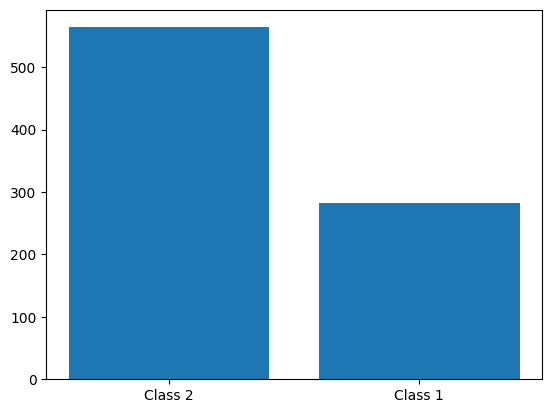

In [273]:
df = pd.read_csv("train.csv")
df.sample()
df.loc[:, "V1":"V3"]
classes = df.loc[:, "Class"].value_counts()
#print(classes, sum(classes))
y_pos = np.arange(len(classes), step=1)
print(classes)
plt.bar(y_pos, classes)
plt.xticks(y_pos, {"Class 1", "Class 2"})


In [39]:
any(df.isnull())    # Missing values
df.isnull().sum()
df = df.fillna(df.mean())   # Fill missing values with the mean values
df.loc[:, "Class"]

3       2
5       2
6       2
7       2
8       2
       ..
1050    1
1052    1
1053    1
1054    1
1055    1
Name: Class, Length: 846, dtype: int64

<AxesSubplot: xlabel='V5', ylabel='V27'>

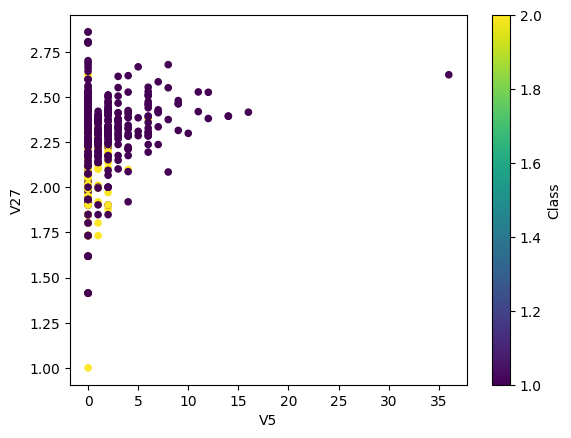

In [221]:
df.describe()
df.fillna(0)
colors = ["red" if c == 1 else "blue" for c in df["Class"]]
labels = ["Class1" if c == 1 else "Class 2" for c in df["Class"]]
df.plot.scatter(x="V5", y="V27", c="Class", colormap="viridis")

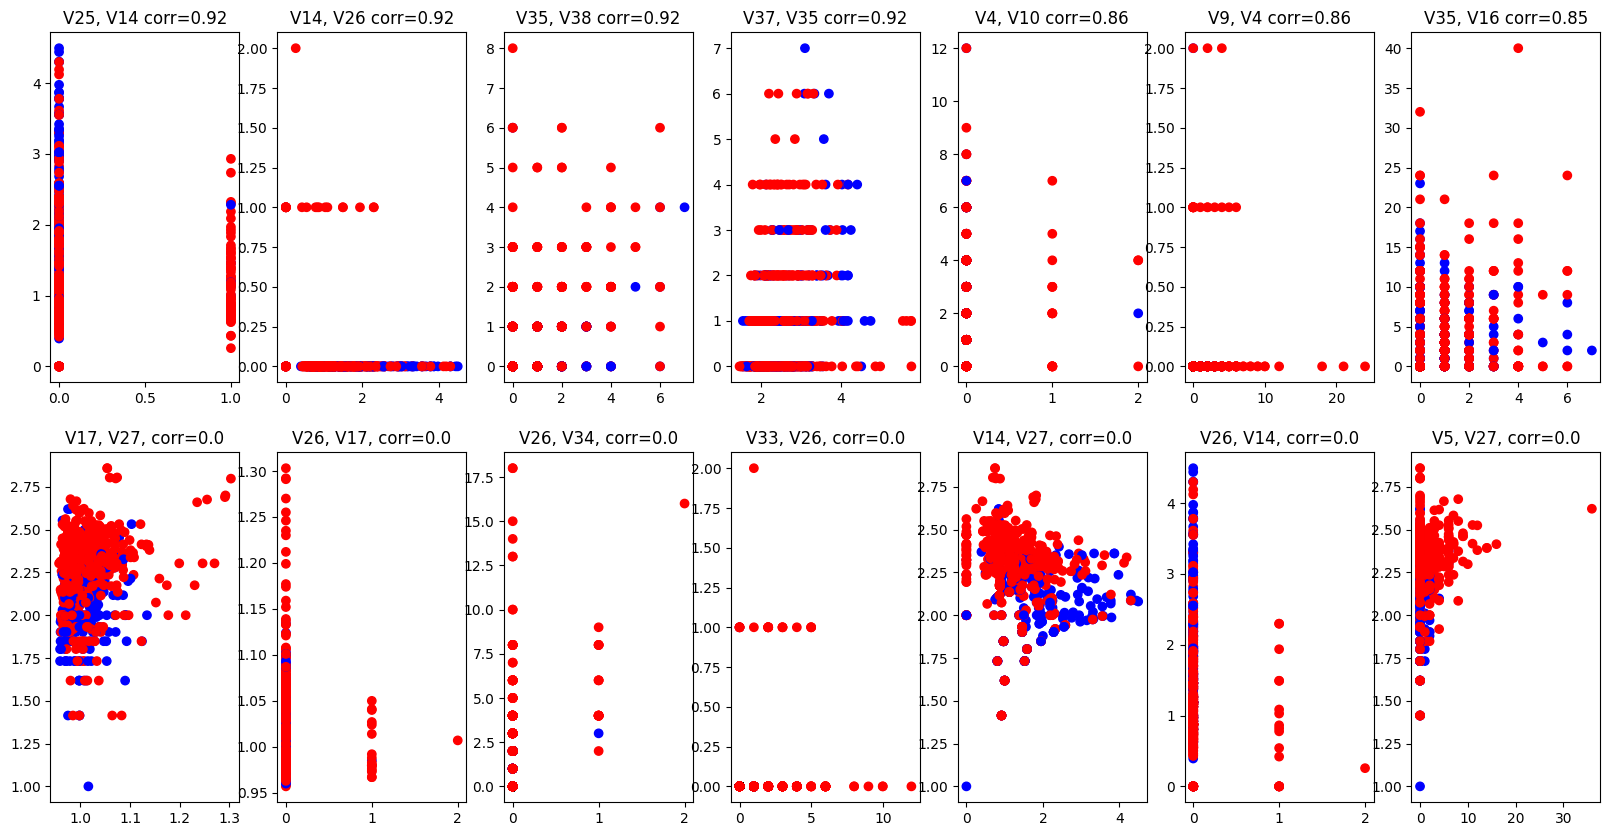

In [231]:
corr = abs(df.corr())   # Only need the magnitude

corr = np.array(corr)   # Convert to numpy array
corr = corr[~np.eye(corr.shape[0], dtype=bool)].reshape(corr.shape[0], -1)  # Remove diagonal elements
corr = pd.DataFrame(corr) # Convert back to dataframe

corr = corr.unstack().sort_values(ascending=False)  # Convert to Series and sort

corr = corr.reset_index()   # Reset labels
corr.columns = ["feature1", "feature2", "corr"] # Rename labels

fig, ax = plt.subplots(2,7, figsize=(20,10))

n = 0
for i in range(len(corr)):
    if n == 7:
        break
    pair = corr.iloc[i]
    if pair[0] and pair[1]:
        ax[0,n].scatter(x=df.loc[:, "V"+str(int(pair[0]))], y=df.loc[:, "V" + str(int(pair[1]))], c=colors, label=labels)  # Display pairs with highest correlations
        ax[0,n].set_title(f"V{str(int(pair[0]))}, V{str(int(pair[1]))} corr={round(pair[2], 2)}")
        n += 1

n = 0
for i in range(len(corr)):
    if n >= 7:
        break
    
    pair = corr[::-1].iloc[i]
    if pair[0] and pair[1]:
        ax[1,n].scatter(x=df.loc[:, "V"+str(int(pair[0]))], y=df.loc[:, "V" + str(int(pair[1]))], c=colors, label=labels)  # Display pairs with lowest correlations
        ax[1,n].set_title(f"V{str(int(pair[0]))}, V{str(int(pair[1]))}, corr={round(pair[2], 2)}")
        
        n += 1

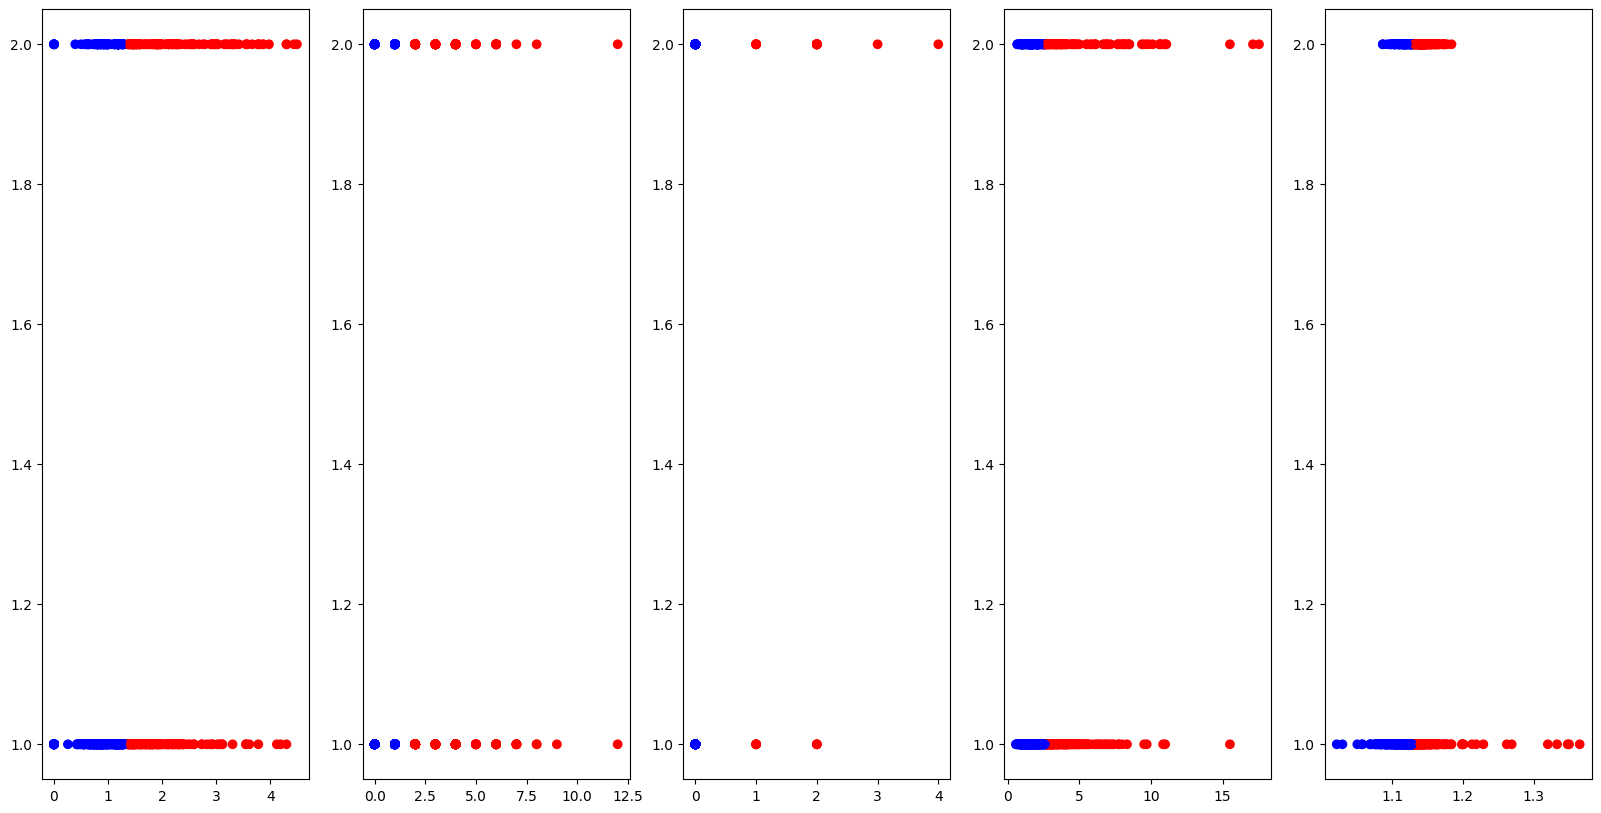

In [319]:
# Get correlation of each feature to the target class and plot the ones with highest correlation
fig, ax = plt.subplots(1,5, figsize=(20,10))

target_corr = df.corr()
pairs = []

for i in range(len(target_corr)-1):
    pairs.append((f"V{i+1}", target_corr.iloc[i,-1]))

pairs = sorted(pairs, key=lambda x: x[1])
pairs = pairs[::-1]

def get_colors(feature: str) -> np.ndarray:
    mean = np.average(df[feature])
    target_colors = ["red" if f > mean else "blue" for f in df[feature]]
    return target_colors
    
     

for i in range(5):
    ax[i].scatter(x=df.loc[:,pairs[i][0]], y=df.loc[:,"Class"], label=pairs[i][0], c=get_colors(pairs[i][0]))
        
    

In [314]:
#"Class" in set(corr.loc[:,"feature1"].values)

In [ ]:
#